In [8]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import image_dataset_from_directory
tf.config.experimental.enable_op_determinism()
tf.keras.utils.set_random_seed(42)
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

In [2]:
train_dataloader = image_dataset_from_directory(
    directory='data/imagenet-new/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training'
)

validation_dataloader = image_dataset_from_directory(
    directory='data/imagenet-new/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation'
)

Found 5000 files belonging to 10 classes.
Using 4000 files for training.
Found 5000 files belonging to 10 classes.
Using 1000 files for validation.


In [3]:
classes = train_dataloader.class_names

In [4]:
def build_model(classes):
    eff = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    pooling='avg',
)
    tf.keras.utils.set_random_seed(42)
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(eff)
    # model.add(tf.keras.Input(shape=(224, 224, 3)))
    # model.add(Conv2D(32, (3, 3), activation='relu'))
    # model.add(MaxPooling2D((2, 2)))
    # model.add(Conv2D(64, (3, 3), activation='relu'))
    # model.add(Dropout(0.25))
    # model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(classes), activation='softmax'))
    eff.trainable = False
    return model

model = build_model(classes)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 4132205 (15.76 MB)
Trainable params: 82634 (322.79 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataloader = train_dataloader.prefetch(buffer_size=AUTOTUNE)
validation_dataloader = validation_dataloader.prefetch(buffer_size=AUTOTUNE)

In [25]:
model.fit(train_dataloader, epochs=5, validation_data=validation_dataloader)

Epoch 1/5


125/125 [==============================] - 72s 572ms/step - loss: 0.3374 - accuracy: 0.8863 - val_loss: 0.4606 - val_accuracy: 0.8410
Epoch 2/5
125/125 [==============================] - 71s 571ms/step - loss: 0.3186 - accuracy: 0.8917 - val_loss: 0.4706 - val_accuracy: 0.8380
Epoch 3/5
125/125 [==============================] - 71s 571ms/step - loss: 0.2964 - accuracy: 0.8975 - val_loss: 0.4754 - val_accuracy: 0.8440
Epoch 4/5
125/125 [==============================] - 71s 571ms/step - loss: 0.2918 - accuracy: 0.9020 - val_loss: 0.4772 - val_accuracy: 0.8420
Epoch 5/5
125/125 [==============================] - 71s 568ms/step - loss: 0.2577 - accuracy: 0.9170 - val_loss: 0.4723 - val_accuracy: 0.8500


In [26]:
from PIL import Image
import numpy as np

img = Image.open('data/imagenet-new/test/images/test_21.JPEG')
img = img.resize((224, 224))
img = np.array(img)

img = np.expand_dims(img, axis=0)

pred = model.predict(img, verbose=0).argmax(axis=1)[0]
classes[pred]

'insect'

In [27]:
files = os.listdir('data/imagenet-new/sample')
for file in files:
    print(file)

val_205.JPEG
val_130.JPEG
val_166.JPEG
val_280.JPEG
val_248.JPEG
val_305.JPEG
val_192.JPEG
val_294.JPEG
val_286.JPEG
val_118.JPEG
val_75.JPEG


In [28]:
len(files)

11

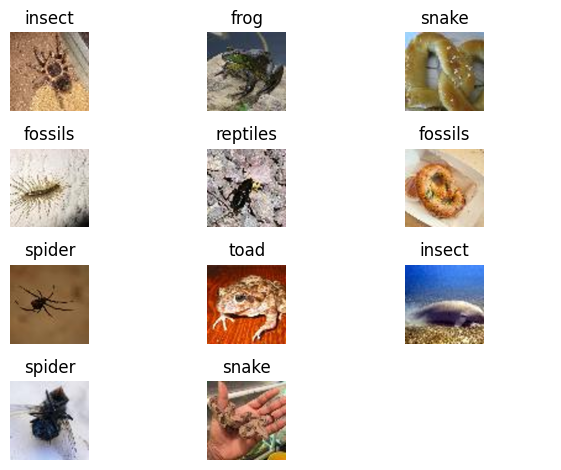

In [29]:
fig, ax = plt.subplots(4,3)
# Flatten the axes array
ax = ax.flatten()

for i in range(len(files)):
    # Read and resize the image
    img = Image.open('data/imagenet-new/sample/' + files[i])
    img = img.resize((224, 224))
    img = np.array(img)
    # Predict the class
    pred = model.predict(np.expand_dims(img, axis=0), verbose=0).argmax(axis=1)[0]
    # Set the title of the plot
    ax[i].set_title(classes[pred])
    # Display the image
    ax[i].imshow(img)
    # Hide the axes
    ax[i].axis('off')

ax[10].axis('off')
ax[11].axis('off')

# Adjust the spacing
fig.tight_layout()

# Show the plot
plt.show()


In [19]:
test_dataloader = image_dataset_from_directory(
    directory='data/imagenet-new/temp',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42
)

Found 11 files belonging to 1 classes.


In [20]:
model.predict(test_dataloader, verbose=0).argmax(axis=1)

array([3, 7, 8, 5, 4, 2, 2, 8, 9, 4, 7])

In [2]:
vgg16 = tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

553467096/553467096 [==============================] - 33s 0us/step


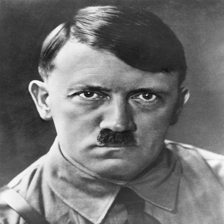

In [26]:
from PIL import Image
adolf = Image.open('data/Adolf-Hitler-1933.webp')
adolf = adolf.resize((224,224))
adolf

In [27]:
pred = vgg16.predict(np.array(adolf).reshape(1,224,224,3))

1/1 [==============================] - 0s 199ms/step


In [22]:
sorted = pred.argsort()

In [28]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
decode_predictions(pred, top=5)  

[[('n03630383', 'lab_coat', 0.46128136),
  ('n04317175', 'stethoscope', 0.060832866),
  ('n03476991', 'hair_spray', 0.03461844),
  ('n03763968', 'military_uniform', 0.024729833),
  ('n02883205', 'bow_tie', 0.021257212)]]